Библиотеки, которые используются в решении:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import time
%matplotlib inline

### Стыров Даниил, 307 группа.

# Практическое задание №2 по ОММ 
# Вариант №10


<img src=https://i.imgur.com/PXUhLoO.png, width=400>

## Постановка задачи
Используя метод переменных направлений, решить краевую задачу:

$$\left\{ \begin{array}{} 
\frac{\partial u}{\partial t} = \Delta u + \cos{\pi y}\ e^t, \quad  0 < x < 1,\ 0 < y < 1,\ 0 < t \leq 1 \\ 
u(0,y,t) = u(1,y,t) = 0, \\ 
u_y(x,0,t) = u_y(x,1,t) = 0, \\ 
u(x,y,0) = 0. \end{array} \right.$$

##  Аналитическое решение задачи
Ищем решение задачи в виде:

$$u(x,y,t)=T(t)V(x,y)$$

Тогда, разделяя переменные, получим:

$$\frac{T'(t)}{T(t)}=\frac{V''(x,y)}{V(x,y)}=-\lambda$$

Имеем две задачи:

$$\left\{ \begin{array}{} T'+\lambda T = 0 \\ T(0)=0 \end{array} \right.$$

$$\left\{ \begin{array}{} \Delta V +\lambda V = 0 \\ 
V\big|_{x=0}=V\big|_{x=1}=0 \\ 
\frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=1}=0\end{array} \right.$$

Ищем функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и, разделяя переменные, получаем две задачи Штурма-Лиувилля на отрезке:

$$\left\{ \begin{array}{} X''+\mu X = 0 \\ X (0)= X (1) = 0 \end{array} \right.$$

$$\left\{ \begin{array}{} Y''+\nu Y = 0 \\ \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=1}=0 \end{array} \right.$$

Отсюда решения:

$$\left\{ \begin{array}{} X=sin(\sqrt{\mu} x),\ \mu=(\pi n)^2,\ n=1,2,... , \\
 Y=cos(\sqrt{\nu} y,)\ \nu=(\pi m)^2,\ m=0,1,... ,  \end{array} \right.$$

Тогда для функции $V_{nm}$ имеем: 

$$V_{nm}=sin(\pi nx)cos(\pi my), $$
$$\lambda_{nm}=\mu_{nm}+\nu_{nm}=(\pi n)^2+(\pi m)^2$$

Рассмотрим теперь задачу Коши:

$$\left\{ \begin{array}{} T_{nm}'+\lambda_{nm} T_{nm} = f_{nm}, \\ T_{nm}(0)=0, \end{array} \right.$$

где $f_{nm}=\frac{1}{||V_{nm}||^2}\int\int_G F(x,y,t)V_{nm}(x,y)\ dx\ dy$

$$f_{nm}=\frac{4e}{||V_{nm}||^2}\int\int_G F(x,y,t)V_{nm}(x,y)\ dx\ dy$$

Тогда, с учетом, что решение представляется в виде: 

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$
 
Получаем решение: $$u(x,y,t)=sin(3x)cos(y)e^{-10t}$$

## Описание разностной схемы
Введем одномерные разностные временную и пространственные сетки в области 
$\Omega = G\otimes[0,T]$:

$$ G: \{(x, y)| x \in (0; 1), y \in (0; 1)\}
       \\
     \omega_{h} : \{(x_i,y_j)| x_i = ih_x, \ i = \overline{0,N_x}, \ N_xh_x = 1;
     y_j = jh_y, \ j = \overline{0,N_y}, \ N_yh_y = 1\} \\
     \omega_{\tau} : \{t_k = k\tau, \ k = \overline{0,M}, \ \tau M = T\}$$
$$\omega_{h\tau} = \omega_{h}\otimes \omega_{\tau}$$

где $M, N_x, N_y$ - число узлов сетки; $h_x, h_y, h_{\tau}$ - шаги по осям x, y, t соответственно. 

На введенной сетке будем рассматривать сеточные функции
$$U^k_{ij} = U(x_i, y_j, t^k)$$

Разностная аппрокимация оператора Лапласа будет иметь вид:
\begin{equation}
    \Lambda U^k_{ij} = \Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}
    \\
    \Lambda_x U^k_{ij} = \dfrac{U^k_{(i+1)j} - 2 U^k_{ij} + U^k_{(i-1)j}}{h_x^2}
    \\
    \Lambda_y U^k_{ij} = \dfrac{U^k_{i(j+1)} - 2 U^k_{ij} + U^k_{i(j-1)}}{h_y^2}
\end{equation}

Для граничных условий Неймана введем аппроксимацию односторонней
разностной производной:
$$
\begin{cases}
        \dfrac{U^k_{i1} - U^k_{i0}}{h_y} = 0, \ k = \overline{0,N_{\tau}}\\
        \dfrac{U^k_{iN_{y}} - U^k_{i(N_{y}-1)}}{h_y} = 0, \ i = \overline{0,N_x} 
\end{cases}
$$

Теперь аппроксимируем уравнение теплопроводности из задачи следующим разностным уравнением:
\begin{align}
    &\ \dfrac{U^{k+1}_{ij} - U^k_{ij}}{\tau} = \Lambda (\delta U^{k+1}_{ij} + (1 - \delta)U^k_{ij}) + f^k_{ij}
    \\
    &\ f^k_{ij} = cos(\pi y_j)e^{-(t^k)}, \ i = \overline{0,N_x-1}, \  j = \overline{0,N_y-1}, \ k = \overline{0,N_{\tau}-1}
\end{align}

При $\delta = 0$ мы получаем явную разностную схему, и решение во внутренних точках вычисляется по формуле:
\begin{equation}
    U^{k+1}_{ij} = U^k_{ij} + \tau (\Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}) + \tau f^k_{ij}
\end{equation}


При $\delta = 1$ мы получаем неявную разностную схему. Для определения $U^{k+1}_{ij}$ мы получаем на каждом шаге линейную систему: 
\begin{equation}
    U^{k+1}_{ij} - \tau (\Lambda_x U^{k+1}_{ij} + \Lambda_y U^{k+1}{ij}) = U^k_{ij} + \tau f^k_{ij}
\end{equation}

In [ ]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
T = 1

Nx, Ny, M = 100, 100, 100

x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
t = np.linspace(0,T,M)
u = np.zeros((Nx, Ny, 2*M+1), dtype=float)

hx = float(xmax-xmin)/(Nx-1)
hy = float(ymax-ymin)/(Ny-1)
tau = float(T)/(M-1)
gx = tau/hx**2
gy = tau/hy**2

In [ ]:
def f(i2, j):
  return np.cos(np.pi*y[i2])*np.exp(tau*j/2) # Возможно ошибка где 0.5

def F1(i1, i2, j):
  return 0.5*gy*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1]) + (1-gy)*u[i1,i2,j-1] + 0.5*tau*f(i2,j+1)

def F2(i1, i2, j):
  return 0.5*gx*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1]) + (1-gx)*u[i1,i2,j-1] + 0.5*tau*f(i2,j-1)

def progonka_po_x(i2, j):
  d = np.zeros(Nx)
  s = np.zeros(Nx)
  d[1] = 0
  s[1] = 0
  A = 0.5*gx
  B = 1 + gx
  C = 0.5*gx
  for m in range(1,Nx-1):
    Fm = -F1(m,i2,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[Nx-1,i2,j] = 0
  for m in range(Nx-1,0,-1):
    u[m-1,i2,j] = d[m]*u[m,i2,j] + s[m]

def progonka_po_y(i1, j):
  d = np.zeros(Ny)
  s = np.zeros(Ny)
  d[1] = 1
  s[1] = 0
  A = 0.5*gy
  B = 1 + gy
  C = 0.5*gy
  for m in range(1,Ny-1):
    Fm = -F2(i1,m,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[i1,Ny-1,j] = s[-1]/(1-d[-1])
  for m in range(Ny-1,0,-1):
    u[i1,m-1,j] = d[m]*u[i1,m,j] + s[m]

In [ ]:
for j in range(1,2*M,2):
  for i2 in range(1,Ny-1):
    progonka_po_x(i2,j)
  for i1 in range(1,Nx-1):
    progonka_po_y(i1,j+1)

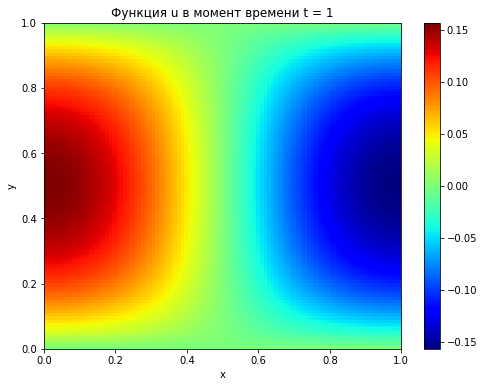

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(x,y,u[:,:,-1], cmap='jet')

plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Функция u в момент времени t = {T}");

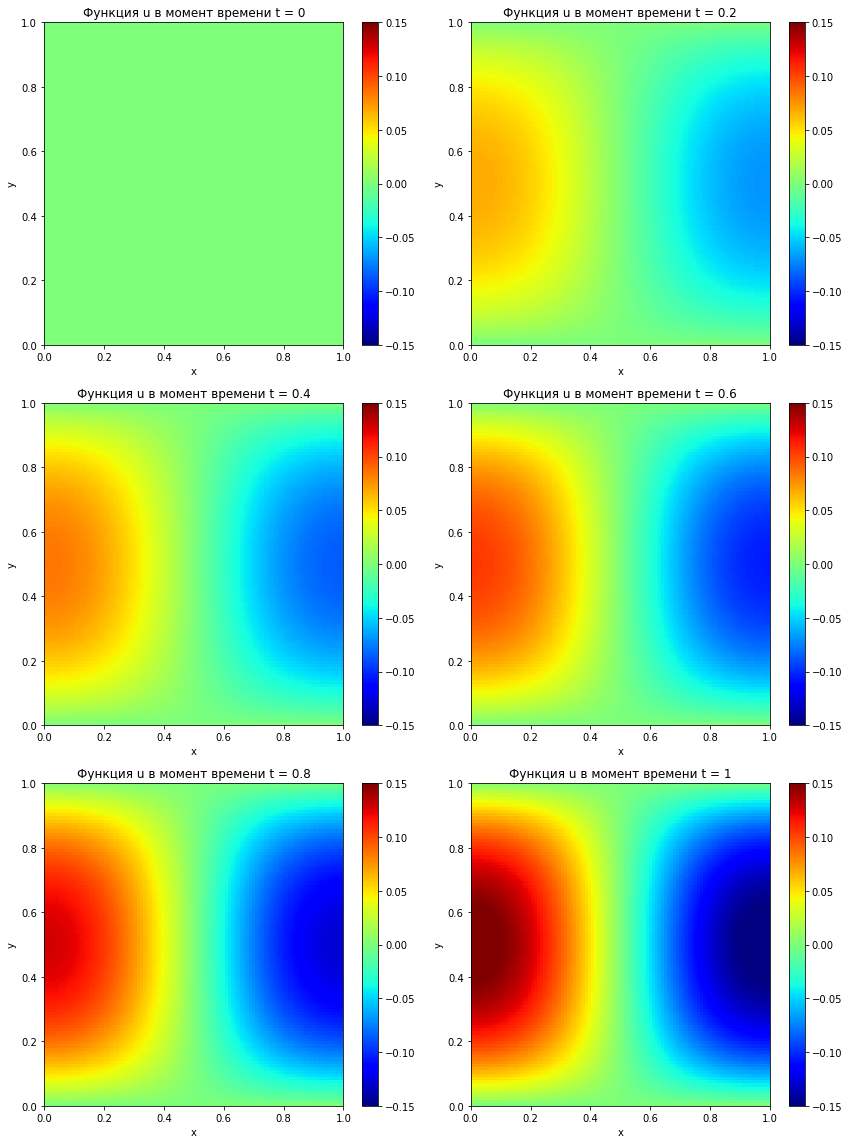

In [ ]:
times = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig = plt.figure(figsize=(12,16))
for i in range(len(times)):
  plt.subplot(3,2,i+1)
  time = int(times[i]/T*(2*M))
  plt.pcolormesh(x,y,u[:,:,time], cmap='jet', vmin=-0.15, vmax=0.15)
  plt.colorbar()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"Функция u в момент времени t = {times[i]}")
plt.tight_layout()